<a href="https://colab.research.google.com/github/chandrashekarswamy/EVA-Phase-01/blob/master/Assignment%2006/%20Assignment%206b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

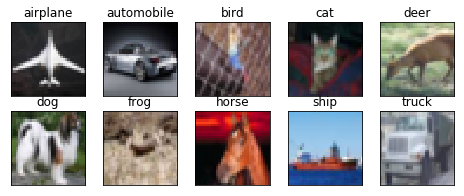

In [39]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [60]:
from keras.layers import concatenate, Input, SeparableConv2D
from keras.models import Model

inputs = Input(shape=(32,32,3)) # 32*32*3

c1 = Convolution2D(32, (3,3), padding='same', activation='relu')(inputs)  #32*32 K = 3*3 ch = 32

c2 = Convolution2D(32, (3,1), padding='same', activation='relu')(c1)      #32*32 K = 3*1 ch = 32
c3 = Convolution2D(32, (1,3), padding='same', activation='relu')(c2)      #32*32 k = 1*3 ch = 32

c4 = concatenate([c2,c3])                                                 #Concatinates c2 and c3
c4 = Dropout(0.1)(c4)

c5 = SeparableConv2D(64,(3,3), padding='same', activation='relu')(c4)     #32*32 k = 3*3 ch = 64
c5 = Dropout(0.05)(c5)
c6 = Convolution2D(128,(3,3), padding='same', activation='relu')(c5)      #32*32 k = 3*3 ch = 128
c6 = Dropout(0.1)(c6)

c7 = MaxPooling2D(pool_size=(2,2))(c6)                                    #16*16 k = 2*2 
c8 = Convolution2D(32, (1,1))(c7)                                         #16*16 K = 1*1 ch = 32

c9 = Convolution2D(32, (3,3), padding='same', activation='relu')(c8)      #16*16 k = 3*3
c10 = Convolution2D(32, (5,5), padding='same', activation='relu')(c8)     #16*16 k = 3*3

c11 = concatenate([c9,c10])                                               #group convolution 3*3 + 5*5
c11 = Dropout(0.1)(c11)

c11 = MaxPooling2D(pool_size=(2,2))(c11)                                  #8*8   k = 2*2 

c12 = Convolution2D(32, (3,3), padding='same', activation='relu')(c11)    #8*8   k = 3*3
c13 = Convolution2D(32, (3,3), padding='same', dilation_rate=1, activation='relu')(c11) #8*8 k = 3*3 stride = 1
c14 = Convolution2D(32, (3,3), padding='same', dilation_rate=2, activation='relu')(c11) #8*8 k = 3*3 stride = 2

c15 = concatenate([c12,c13,c14])                                          #group convolution 3*3 with stride 1 and 2 
c15 = Dropout(0.1)(c15)

c16 = Convolution2D(32, (8,8), activation='relu')(c15)                    #8*8 k = 8*8
c17 = Convolution2D(10, (1,1), activation='softmax')(c16)                 #1*1 k = 1*1

predictions = Flatten()(c17)
model = Model(inputs=inputs, outputs=predictions)
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_208 (Conv2D)             (None, 32, 32, 32)   896         input_18[0][0]                   
__________________________________________________________________________________________________
conv2d_209 (Conv2D)             (None, 32, 32, 32)   3104        conv2d_208[0][0]                 
__________________________________________________________________________________________________
conv2d_210 (Conv2D)             (None, 32, 32, 32)   3104        conv2d_209[0][0]                 
__________________________________________________________________________________________________
concatenat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=195, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
195/195 [==============================] - 21s 106ms/step - loss: 0.0740 - acc: 0.9743 - val_loss: 1.1218 - val_acc: 0.7681
Epoch 2/50
195/195 [==============================] - 20s 101ms/step - loss: 0.0632 - acc: 0.9782 - val_loss: 1.1500 - val_acc: 0.7675
Epoch 3/50
195/195 [==============================] - 19s 100ms/step - loss: 0.0541 - acc: 0.9815 - val_loss: 1.2244 - val_acc: 0.7679
Epoch 4/50
195/195 [==============================] - 19s 100ms/step - loss: 0.0620 - acc: 0.9780 - val_loss: 1.1634 - val_acc: 0.7702
Epoch 5/50
195/195 [==============================] - 19s 100ms/step - loss: 0.0662 - acc: 0.9770 - val_loss: 1.1979 - val_acc: 0.7681
Epoch 6/50
195/195 [==============================] - 19s 100ms/step - loss: 0.0618 - acc: 0.9780 - val_loss: 1.2552 - val_acc: 0.7665
Epoch 7/50
195/195 [==============================] - 19s 100ms/step - loss: 0.0643 - acc: 0.9785 - val_loss: 1.2545 - val_acc: 0.7644
Epoch 8/50
195/195 [==============================] - 2

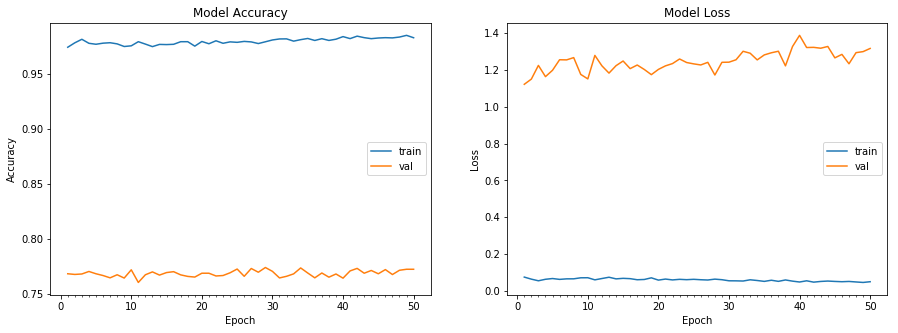

Accuracy on test data is: 77.22


In [63]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))